In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/home/vituri/Documentos/GitHub/TDA_workshop_EBT2024"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using Meshes, GeoIO
import GLMakie as gl
using ProgressMeter

In [3]:
read_mesh(filepath) = GeoIO.load(filepath).geometry

plot_mesh(ms) = viz(ms);

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


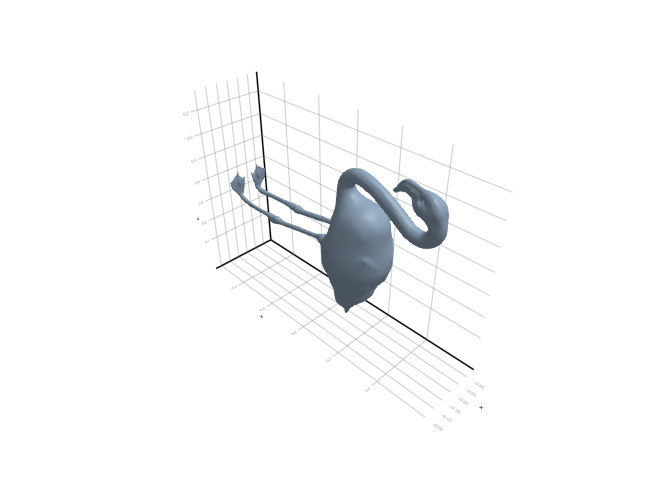

In [4]:
filepath = "meshes/flamingo-poses/flam-reference.obj"
ms = read_mesh(filepath)

plot_mesh(ms)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


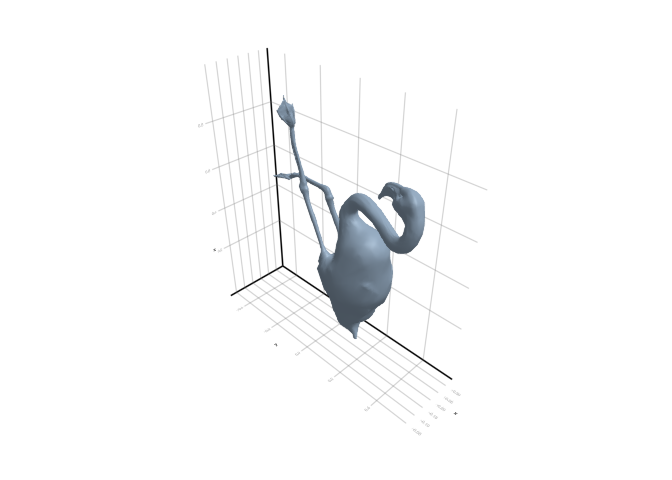

In [5]:
ms2 = read_mesh("meshes/flamingo-poses/flam-01.obj")

plot_mesh(ms2)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


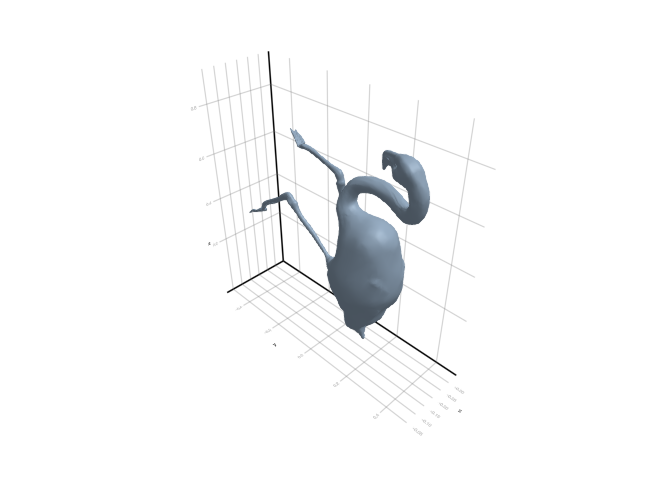

In [6]:
ms2 = read_mesh("meshes/flamingo-poses/flam-02.obj")

plot_mesh(ms2)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


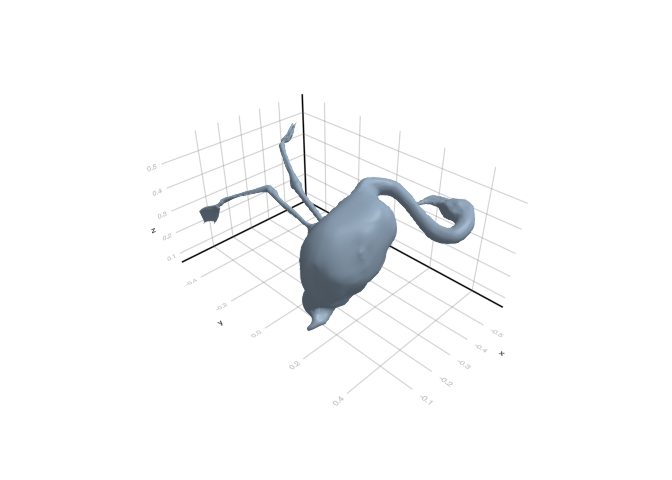

In [7]:
ms2 = read_mesh("meshes/flamingo-poses/flam-03.obj")

plot_mesh(ms2)

In [8]:
readdir("meshes/")

8-element Vector{String}:
 "camel-poses"
 "cat-poses"
 "elephant-poses"
 "face-poses"
 "flamingo-poses"
 "head-poses"
 "horse-poses"
 "lion-poses"

In [9]:
using MetricSpaces

mesh_to_metric_space(ms) = ms.vertices .|> coordinates .|> Vector |> EuclideanSpace

mesh_to_metric_space (generic function with 1 method)

In [10]:
X = mesh_to_metric_space(ms)

26907-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.0497887, 0.179158, 0.304686]
 [-0.0478521, 0.176355, 0.337555]
 [-0.0489072, 0.170843, 0.36641]
 [-0.0479558, 0.154587, 0.319926]
 [-0.0484908, 0.148718, 0.356395]
 [-0.0549708, 0.129732, 0.300859]
 [-0.0529351, 0.125235, 0.325443]
 [-0.0537256, 0.124306, 0.346663]
 [-0.0569744, 0.201286, 0.371339]
 [-0.0536567, 0.19095, 0.297565]
 [-0.0522451, 0.191074, 0.306529]
 [-0.0571656, 0.181709, 0.282749]
 [-0.0524422, 0.185973, 0.296856]
 ⋮
 [-0.209925, 0.44, 0.658976]
 [-0.20707, 0.420017, 0.655563]
 [-0.210662, 0.444178, 0.660018]
 [-0.211038, 0.441635, 0.658588]
 [-0.208734, 0.420334, 0.651864]
 [-0.211586, 0.429432, 0.654244]
 [-0.210811, 0.425791, 0.653265]
 [-0.210709, 0.423044, 0.649643]
 [-0.211377, 0.439884, 0.657541]
 [-0.211205, 0.437203, 0.65695]
 [-0.211346, 0.434063, 0.656262]
 [-0.212218, 0.433793, 0.654967]

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


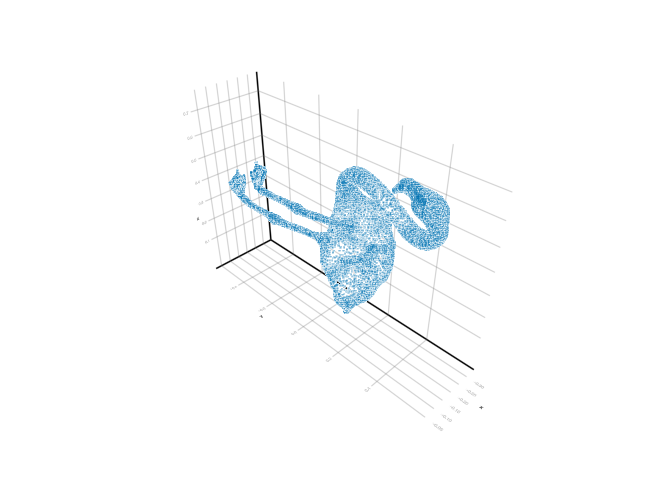

In [11]:
gl.scatter(X, markersize = 1)

In [12]:
using Graphs, SimpleWeightedGraphs

function graph_from_mesh(ms)
    # the set of vertices
    V = coordinates.(ms.vertices)

    # create an empty graph
    g = SimpleWeightedGraph()

    # add n vertices to it
    n = length(V)
    add_vertices!(g, n)

    # the set of triangles of the mesh ms
    triangles = ms.topology.connec

    # for each triangle, add its edges to the graph
    @showprogress desc = "Adding vertices to graph..." for t ∈ triangles
        v1, v2, v3 = t.indices
        add_edge!(g, v1, v2, dist_euclidean(V[v1], V[v2]))
        add_edge!(g, v1, v3, dist_euclidean(V[v1], V[v3]))
        add_edge!(g, v2, v3, dist_euclidean(V[v2], V[v3]))
    end

    g
end;

In [13]:
g = graph_from_mesh(ms)

Adding vertices to graph...   0%|                        |  ETA: 1:26:18

Adding vertices to graph... 100%|████████████████████████| Time: 0:00:01


{26907, 79244} undirected simple Int64 graph with Float64 weights

In [14]:
weights(g)

26907×26907 SparseArrays.SparseMatrixCSC{Float64, Int64} with 158488 stored entries:
⎡⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣶⣶⣖⣆⣀⡀⢀⡀⠀⠀⠀⠀⠀⠀⠀⠤⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠈⢋⠛⠿⡿⣿⣿⣾⣆⣀⡀⠀⠀⠀⠀⠀⠉⠛⠿⢤⡀⠀⠀⠈⠁⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠛⠻⠿⠷⠷⣦⣀⡀⠀⠀⠀⠀⠀⠉⠙⠂⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒⠠⠠⠄⡀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠳⢤⣄⣀⠀⠀⠀⠐⢦⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠐⠒⠀⠀⠀⠀⠀⠀⢀⡀⠀⠈⠉⠛⠳⠶⣤⣈⠙⎥
⎢⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠰⣦⣤⣠⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠈⠉⠂⠀⠀⠀⠉⠛⎥
⎢⢻⣿⡀⠀⠀⠀⠀⠀⠀⠀⠀⣻⣿⣿⣿⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢸⢿⡦⢀⠀⠀⢠⠀⠀⠀⠀⠐⠛⢿⢿⣷⣷⡤⡄⢐⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠈⢹⣿⡄⠀⠀⠀⡂⠀⠀⠀⠀⠀⠀⠙⡿⣿⣿⣷⣾⣄⢀⡀⠀⠀⠀⠀⠀⠀⠀⠑⣖⠂⠀⠀⠀⠀⠀⠂⠀⎥
⎢⠀⢈⣿⣯⡀⠀⠀⠡⡀⠀⠀⠀⠀⠀⢀⢉⣹⣿⣿⣿⣼⣕⣀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢷⡄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⣻⣿⣷⠀⠀⠀⢃⠀⠀⠀⠀⠀⠀⠀⠀⢙⢖⢿⣿⣿⣧⣲⣀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣄⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⢹⣿⡆⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠘⢩⣻⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠹⣧⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⢽⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠙⢿⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠃⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⢻⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠻⣦⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢧⠀⠀⠀⠈⣧⠀⠀⢀⠀⠀⠈⠘⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡄⠀⠀⠀⠀⠀⠀⢀⠀⠀⎥
⎢⠀⠈⣧⠀⠀⠀⠙⣆⠀⠈⠆⠀⠀⠀⠀⠉⢱⢤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣦⡀⠀⠀⠀⠀⠘⢲⠀⎥
⎢⠀⠀⠛⣇⠀⠀⠀⢹⡆⠀⡆⠀⠀⠀⠀⠀⠈⠀⠙⠷⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⢰⣀⎥
⎢⠀⠀⠀⠈⣇⠀⠀⠀⢿⡀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣀⠀⠀⠙⎥
⎢⠀⠀⡀⠀⠈⠀⢀⠀⠘⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⢀⣀⠀⠀⠀⠀⠘⠻⣦⡀⠀⎥
⎣⠀⠀⠁⠀⠀⠀⠈⠓⣆⠘⣧⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠒⠐⢲⣄⠀⠀⠈⠻⣦⎦

In [15]:
is_connected(g)

false

In [16]:
connected_components(g)

514-element Vector{Vector{Int64}}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  26898, 26899, 26900, 26901, 26902, 26903, 26904, 26905, 26906, 26907]
 [4032]
 [4036]
 [4039]
 [4042]
 [4046]
 [4047]
 [4048]
 [4049]
 [4050]
 [4077]
 [4099]
 [4100]
 ⋮
 [7089]
 [7090]
 [7091]
 [7092]
 [7093]
 [7094]
 [7095]
 [7096]
 [7097]
 [7098]
 [7099]
 [7100]

In [17]:
function extract_biggest_connected_component(g)
    cc_components = connected_components(g)
    ids_biggest_component = cc_components[findmax(length, cc_components)[2]]

    # modify the graph g on place
    g = g[ids_biggest_component]

    # return g and the ids of the biggest connected component
    g, ids_biggest_component
end

extract_biggest_connected_component (generic function with 1 method)

In [18]:
g, ids_biggest_component = extract_biggest_connected_component(g);

In [19]:
is_connected(g)

true

In [20]:
X = X[ids_biggest_component]

26394-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.0497887, 0.179158, 0.304686]
 [-0.0478521, 0.176355, 0.337555]
 [-0.0489072, 0.170843, 0.36641]
 [-0.0479558, 0.154587, 0.319926]
 [-0.0484908, 0.148718, 0.356395]
 [-0.0549708, 0.129732, 0.300859]
 [-0.0529351, 0.125235, 0.325443]
 [-0.0537256, 0.124306, 0.346663]
 [-0.0569744, 0.201286, 0.371339]
 [-0.0536567, 0.19095, 0.297565]
 [-0.0522451, 0.191074, 0.306529]
 [-0.0571656, 0.181709, 0.282749]
 [-0.0524422, 0.185973, 0.296856]
 ⋮
 [-0.209925, 0.44, 0.658976]
 [-0.20707, 0.420017, 0.655563]
 [-0.210662, 0.444178, 0.660018]
 [-0.211038, 0.441635, 0.658588]
 [-0.208734, 0.420334, 0.651864]
 [-0.211586, 0.429432, 0.654244]
 [-0.210811, 0.425791, 0.653265]
 [-0.210709, 0.423044, 0.649643]
 [-0.211377, 0.439884, 0.657541]
 [-0.211205, 0.437203, 0.65695]
 [-0.211346, 0.434063, 0.656262]
 [-0.212218, 0.433793, 0.654967]

In [21]:
ids_fps = farthest_points_sample(X, 500);
X_fps = X[ids_fps]

Progress:   0%|▏                                        |  ETA: 0:01:07

Progress:  25%|██████████▏                              |  ETA: 0:00:01

Progress:  74%|██████████████████████████████▏          |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


500-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.120631, -0.294638, 0.31228]
 [-0.194948, 0.507357, 0.651442]
 [-0.187234, 0.236558, 0.161646]
 [-0.180035, 0.0754595, 0.570378]
 [-0.235163, -0.0485806, 0.334342]
 [-0.184285, 0.288099, 0.420993]
 [-0.27207, -0.467607, 0.405263]
 [-0.0583353, 0.112592, 0.32669]
 [-0.317661, 0.151821, 0.329006]
 [-0.18726, 0.278753, 0.632399]
 [-0.179873, 0.112227, 0.00638093]
 [-0.0868923, -0.467545, 0.403375]
 [-0.192097, 0.0779077, 0.225597]
 ⋮
 [-0.315934, 0.130674, 0.356519]
 [-0.17312, 0.297081, 0.297581]
 [-0.195249, 0.491089, 0.674894]
 [-0.148962, 0.0449514, 0.349176]
 [-0.128298, -0.198434, 0.309948]
 [-0.229003, -0.458264, 0.373097]
 [-0.190633, 0.147065, 0.568836]
 [-0.19847, 0.453805, 0.686748]
 [-0.238034, -0.0379528, 0.356185]
 [-0.158646, 0.161827, 0.655504]
 [-0.279633, 0.152089, 0.465321]
 [-0.311879, 0.165324, 0.294293]

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


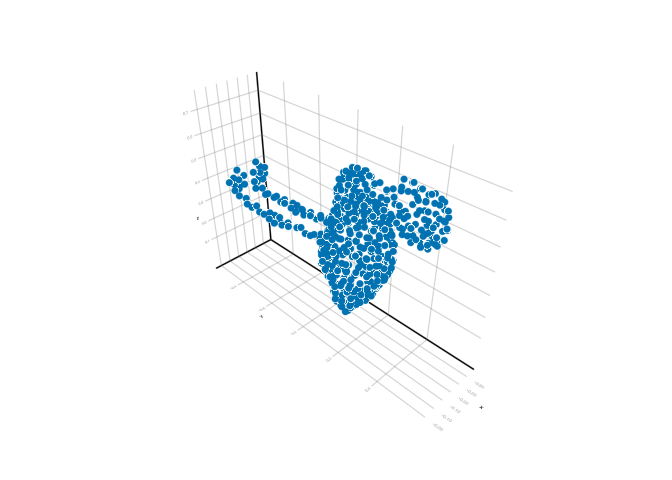

In [22]:
gl.scatter(X_fps, markersize = 10)

In [23]:
function geodesic_distance_from_graph(g, ids)
    n = length(ids)
    D = zeros(n, n)

    @showprogress desc = "Calculating geodesic distance..." Threads.@threads for (i, id) ∈ collect(enumerate(ids))
        dts = dijkstra_shortest_paths(g, id)
        D[i, :] = dts.dists[ids]
    end

    # force simmetry on X, because of small difference
    # in the calculation of paths
    for i ∈ 1:n
        for j ∈ i:n
            D[i, j] = D[j, i]
        end
    end

    # normalize the distance
    max_dist = maximum(D)
    D = D ./ max_dist

    return D
end

geodesic_distance_from_graph (generic function with 1 method)

In [24]:
D = geodesic_distance_from_graph(g, ids_fps)

Calculating geodesic distance...   0%|▏                  |  ETA: 0:00:46

Calculating geodesic distance...   3%|▌                  |  ETA: 0:00:10

Calculating geodesic distance...   6%|█▏                 |  ETA: 0:00:07

Calculating geodesic distance...   8%|█▌                 |  ETA: 0:00:06

Calculating geodesic distance...  11%|██                 |  ETA: 0:00:05

Calculating geodesic distance...  13%|██▌                |  ETA: 0:00:05

Calculating geodesic distance...  16%|███                |  ETA: 0:00:04

Calculating geodesic distance...  19%|███▋               |  ETA: 0:00:04

Calculating geodesic distance...  22%|████▏              |  ETA: 0:00:04

Calculating geodesic distance...  24%|████▋              |  ETA: 0:00:04

Calculating geodesic distance...  27%|█████▏             |  ETA: 0:00:03

Calculating geodesic distance...  29%|█████▋             |  ETA: 0:00:03

Calculating geodesic distance...  32%|██████▏            |  ETA: 0:00:03

Calculating geodesic distance...  35%|██████▋            |  ETA: 0:00:03

Calculating geodesic distance...  37%|███████▏           |  ETA: 0:00:03

Calculating geodesic distance...  40%|███████▌           |  ETA: 0:00:03

Calculating geodesic distance...  42%|████████           |  ETA: 0:00:03

Calculating geodesic distance...  45%|████████▋          |  ETA: 0:00:02

Calculating geodesic distance...  48%|█████████▏         |  ETA: 0:00:02

Calculating geodesic distance...  50%|█████████▋         |  ETA: 0:00:02

Calculating geodesic distance...  53%|██████████▏        |  ETA: 0:00:02

Calculating geodesic distance...  56%|██████████▋        |  ETA: 0:00:02

Calculating geodesic distance...  58%|███████████        |  ETA: 0:00:02

Calculating geodesic distance...  61%|███████████▌       |  ETA: 0:00:02

Calculating geodesic distance...  63%|████████████       |  ETA: 0:00:02

Calculating geodesic distance...  66%|████████████▌      |  ETA: 0:00:01

Calculating geodesic distance...  69%|█████████████      |  ETA: 0:00:01

Calculating geodesic distance...  71%|█████████████▌     |  ETA: 0:00:01

Calculating geodesic distance...  74%|██████████████     |  ETA: 0:00:01

Calculating geodesic distance...  76%|██████████████▌    |  ETA: 0:00:01

Calculating geodesic distance...  79%|███████████████    |  ETA: 0:00:01

Calculating geodesic distance...  82%|███████████████▌   |  ETA: 0:00:01

Calculating geodesic distance...  84%|████████████████   |  ETA: 0:00:01

Calculating geodesic distance...  87%|████████████████▌  |  ETA: 0:00:01

Calculating geodesic distance...  89%|█████████████████  |  ETA: 0:00:00

Calculating geodesic distance...  92%|█████████████████▌ |  ETA: 0:00:00

Calculating geodesic distance...  95%|██████████████████ |  ETA: 0:00:00

Calculating geodesic distance...  97%|██████████████████▌|  ETA: 0:00:00

Calculating geodesic distance...  99%|███████████████████|  ETA: 0:00:00

Calculating geodesic distance... 100%|███████████████████| Time: 0:00:04


500×500 Matrix{Float64}:
 0.0        0.747168   0.481459  …  0.465615   0.3961     0.420313
 0.747168   0.0        0.689759     0.306707   0.433766   0.558539
 0.481459   0.689759   0.0          0.427537   0.274025   0.150124
 0.391221   0.38613    0.381776     0.0935612  0.117345   0.233684
 0.35958    0.576244   0.304082     0.312255   0.187319   0.178194
 0.483322   0.504468   0.195287  …  0.23923    0.156439   0.177542
 0.700884   0.911608   0.647811     0.648679   0.525751   0.519866
 0.302856   0.539335   0.198998     0.258732   0.231407   0.249903
 0.410106   0.532577   0.175311     0.275651   0.100889   0.0259624
 0.542009   0.223405   0.482403     0.087833   0.226306   0.350974
 0.485982   0.767489   0.14921   …  0.493055   0.349726   0.227777
 0.175735   0.917391   0.654082     0.635838   0.566296   0.591549
 0.339472   0.612938   0.183912     0.338505   0.214685   0.126924
 ⋮                               ⋱                        
 0.397904   0.512445   0.199151     0.255519

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


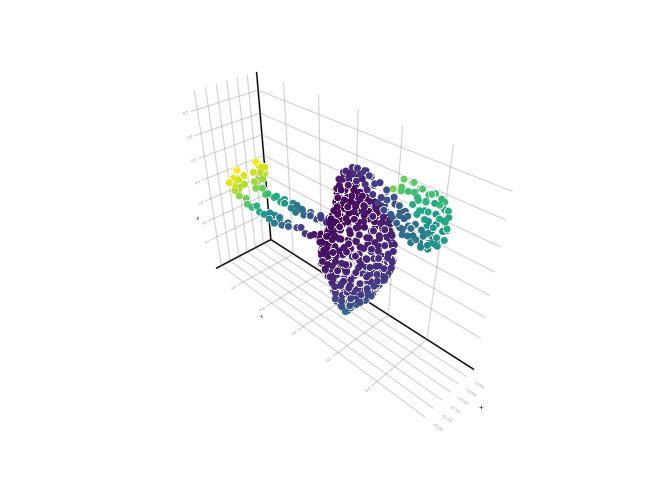

In [25]:
exc = map(sum, eachcol(D))

gl.scatter(X_fps, color = exc, markersize = 10)

In [26]:
import Ripserer as Rp
import PersistenceDiagrams as Pd
import Plots

In [27]:
pd = Rp.ripserer(D, dim_max = 1, verbose=true, sparse = true, threshold = 0.9)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/dMfiC/src/ProgressMeter.jl:594
Computing 0d intervals... 100%|█████████████████████████| Time: 0:00:00
  n_intervals:  500


123,845 edges to reduce.


Done. Time: 0:00:02


2-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 500-element 0-dimensional PersistenceDiagram
 249-element 1-dimensional PersistenceDiagram

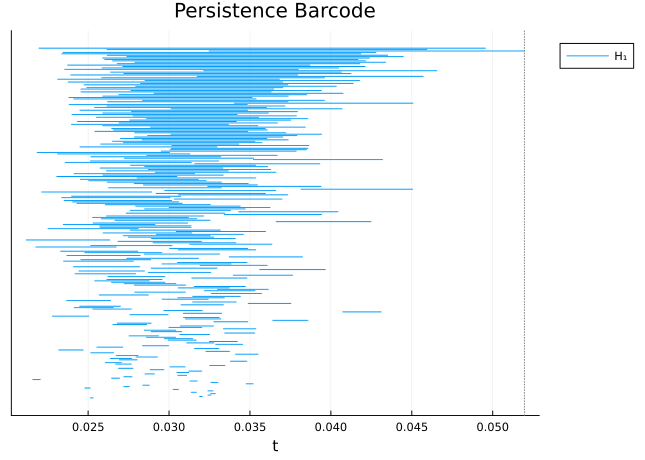

In [28]:
function plot_barcode(pd)
    threshold = pd[2] .|> last |> maximum
    Rp.barcode(pd[2], infinity = threshold)
end

plot_barcode(pd)

In [29]:
function file_to_barcode(filepath, n_points = 1000, dim_max = 1)
    ms = read_mesh(filepath)

    X = mesh_to_metric_space(ms)
    g = graph_from_mesh(ms)

    g, ids_biggest_component = extract_biggest_connected_component(g)
    X = X[ids_biggest_component]

    ids_fps = farthest_points_sample(X, n_points);
    X_fps = X[ids_fps]

    D = geodesic_distance_from_graph(g, ids_fps)

    pd = Rp.ripserer(D, dim_max = dim_max, verbose=true, sparse = true, threshold = 0.8)

    return X_fps, D, pd
end

file_to_barcode (generic function with 3 methods)

In [30]:
# using Chain
# function list_files(path="", pattern="")
#     files =
#         @chain begin
#             map(walkdir(path)) do (root, dirs, files)
#                 joinpath.(root, files)
#             end
#             reduce(vcat, _)
#             filter(x -> occursin(pattern, x), _)
#         end

#     files
# end

In [31]:
# filepaths = list_files("meshes/", "obj")

In [32]:
# filepath = filepaths[10]

# using FileIO
# X_fps, D, pd = file_to_barcode(filepath)


# new_filepath = replace(filepath, ".obj" => ".jld2")
# save_object(new_filepath, pd[2:2])